원본 이미지에 변형을 가해, 새로운 데이터를 생성하는 방식

keras의 ImageDataGenerator를 사용한다.   
rotation_range, width_shift_range, height_shift_range, rescale, shear_range, horizontal_flip, vertical_flip  로 변형할 수 있다. 


![](./resource/imagegenerator.png)

- 이미지 로드 과정에서 img_to_array()를 이용해 numpy 타입으로 변환해야 한다. 
- flow(x, y, batch_size=): 주어진 데이터에서 batch_size에 지정된 개수만큼 무작위로 뽑아 변형
- 혹은 flow_from_directory(path, batch_size=, class_mode=''): 주어진 path에서 batch_size만큼 읽어서 변형을 가한다. 생성되는 데이터의 label은 path의 하위 디렉토리 이름으로 인식되며 class_mode로 지정된 (binary, sparse, categorical)와 같은 형태로 표현
- next() 함수를 실행할 떄마다 flow() 혹은 flow_from_directory() 함수에서 지정한 batch_size만큼의 변형된 데이터와 label이 리턴된다. 
return 값을 담은 x의 shape는 ```x.shape --> (batch_size, height, width, channel)```이다.

In [18]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

## flow() 예제

In [19]:
gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, shear_range=0.4, horizontal_flip=True)
# 30도 이내로 회전, 가로 방향 30% 범위에서 이동, 40% 범위에서 기울임, 좌우반전 가능

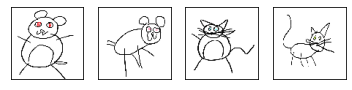

In [20]:
img_array_list = []
img_names= [ './resource/dog1.png', './resource/dog2.png', './resource/cat1.png', './resource/cat2.png' ]

for i in range(len(img_names)):
    loaded_img = load_img(img_names[i], target_size=(100,100))
    loaded_img_array = img_to_array(loaded_img) / 255.0
    img_array_list.append(loaded_img_array)

for i in range(len(img_names)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [21]:
batch_size = 2

data_gen = gen.flow(np.array(img_array_list), batch_size=batch_size) 

flow에 입력으로 주어지는 원본 데이터(img_array_list)의 shape = (원본 데이터 전체 개수, 높이, 너비, 채널)이다.

즉, shape가 (100, 100, 3)인 원본데이터가 4개가 있다면 flow()함수를 사용하기 위해선 (4, 100, 100, 3)의 원본 데이터의 총 개수가 포함된 4차원 텐서 형태로 변환해줘야 한다. 

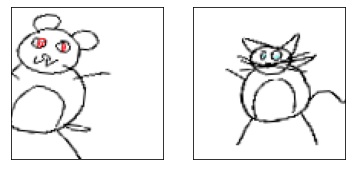

In [22]:
img = data_gen.next() # 지정된 개수만큼 이미지 생성, batch_size=2이므로 2개 생성

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

## flow_from_directory() 예제

In [23]:
gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, shear_range=0.3, rescale=1./255)

In [24]:
path = './flow_from_dir/'
batch_size = 4

data_gen = gen.flow_from_directory(directory=path, batch_size=batch_size, 
                                    shuffle=True, target_size=(100,100), class_mode='categorical')
# class_mode: 정답을 나타내는 방식을 지정
# binary:정답이 2진수, categorical:정답이 one-hot encoding, sparse:정답이 십진수

Found 4 images belonging to 2 classes.


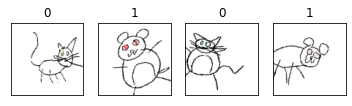

In [25]:
img, label = data_gen.next()

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])

    plt.title(str(np.argmax(label[i])))

    plt.imshow(img[i])

In [26]:
label

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

class_mode를 categorical로 지정했으므로 정답은 on-hot encoding 방식으로 나타난다.